# Clustering

Clustering is an unsupervised learning technique useful to find similarity amongst data.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load and plot data

In [14]:
df = pd.read_csv('../data/iris.csv')

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
import seaborn as sns

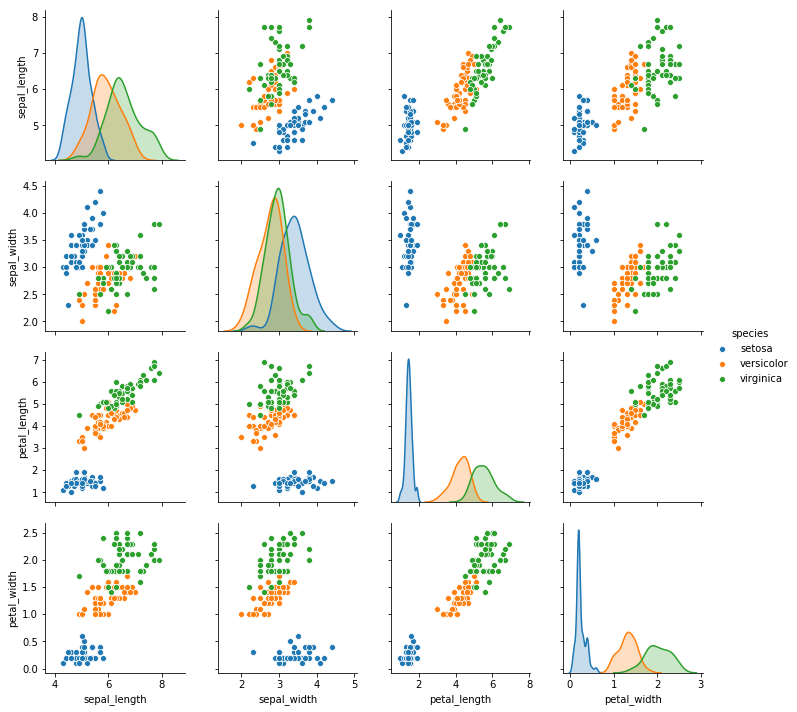

In [17]:
sns.pairplot(df, hue='species');

## Encode labels

In [18]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [19]:
df['target_n'] = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

## Kmeans clustering

In [33]:
from sklearn.cluster import KMeans

X = df[['sepal_length','sepal_width','petal_length','petal_width']]
km = KMeans(3, init = 'random')
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
centers = km.cluster_centers_
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ]])

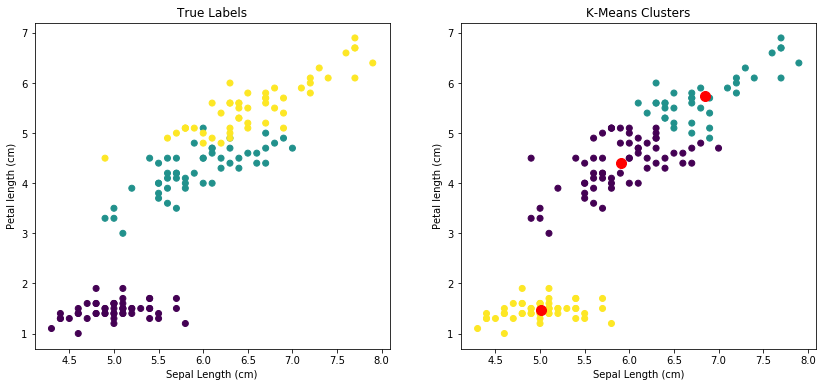

In [35]:
plt.figure(figsize = (14,6))
plt.subplot(121)
plt.scatter(df.sepal_length, df.petal_length, c=df['target_n'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('True Labels')

plt.subplot(122)
plt.scatter(df.sepal_length, df.petal_length, c=km.labels_)
plt.scatter(centers[:,0], centers[:,2], marker='o', c='r', s=100)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('K-Means Clusters');

### Exercise 1
- discuss with your pair:
    - why do cluster centers have 4 coordinates?
    - do the colors in the two plots coincide? Why?
- change the number of clusters using the n_clusters parameter. What happens?
- change the initialization parameters of KMeans to 'random'. What happens?
- run the clustering multiple times, do the centroid positions change?

### Exercise 2
- calculate silhouette_score for different values of k. You will have to extract the labels from km at different values of k
- plot the silhouette score as a function of k for k between 2 and 10
- discuss with your pair:
    - what value of k gives the highest silhouette score?
    - did you expect that result?

### Exercise 3

Try clustering with another method of the ones you find here: http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html


### Exercise 4

In the data folder you can find two more datasets ready for clustering:

- `../data/Wholesale customers data.csv`
- `../data/Absenteeism_at_work.csv`


Choose one and repeat the following steps:

1. Load the dataset
- Inspect it with `.read()` and `.info()`
- decide which features you are going to use for clustering (hint: categorical features are tricky, you may want to ignore them for now)
- rescale the features
- train K-Means and find the optimal value of K using the silhouette coefficient
- does the dataset cluster well?
- train DBSSCAN and check the number of clusters found
- inspect a couple of clusters and see if you can describe the members